<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-Data" data-toc-modified-id="The-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The Data</a></span></li><li><span><a href="#Digital-Referral-Numbers---As-at-<span id='python_84ae92d156d249f28433f1d9a692f71b_178'></span>" data-toc-modified-id="Digital-Referral-Numbers---As-at-<span id='python_84ae92d156d249f28433f1d9a692f71b_48'></span>-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Digital Referral Numbers - As at <span id="python_84ae92d156d249f28433f1d9a692f71b_99"></span></a></span><ul class="toc-item"><li><span><a href="#Reasons-for-Referrals" data-toc-modified-id="Reasons-for-Referrals-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Reasons for Referrals</a></span><ul class="toc-item"><li><span><a href="#Approach:" data-toc-modified-id="Approach:-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Approach:</a></span></li><li><span><a href="#Findings:" data-toc-modified-id="Findings:-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Findings:</a></span><ul class="toc-item"><li><span><a href="#Referral-Numbers" data-toc-modified-id="Referral-Numbers-2.1.2.1"><span class="toc-item-num">2.1.2.1&nbsp;&nbsp;</span>Referral Numbers</a></span></li></ul></li></ul></li><li><span><a href="#Timing-of-Referrals" data-toc-modified-id="Timing-of-Referrals-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Timing of Referrals</a></span><ul class="toc-item"><li><span><a href="#Word-Cloud" data-toc-modified-id="Word-Cloud-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Word Cloud</a></span></li></ul></li></ul></li></ul></div>

In [1]:
%run "C:\Users\BILHA\Google Drive\xRepos\xUtilz\\utilz_only_loader.ipynb"

In [2]:
db = pd.read_csv( "181106_Referral_Reasons.csv" )
#db.head(5)
#db.dtypes

In [3]:
## Add Category column for Referral Reasons
reasons_groupz = { 
    "Neonates" : [ "months", "umbilical"], 
    "Pregnancy" : ["delivery"], 
    "U5 Danger Signs" : [ "Danger", "Diarrhoea", "Diarrhea", "Dairrhea", "Coughing", "Fever","Pneumonia"],
    "HIVST" : ["reactive", "partner", "intimate"], 
    "Unsupported Cases" : []
}

db["Reason for Referral"] = db["Referral Reason"].apply( lambda x: searchString(x, reasons_groupz) ) 

In [4]:
# 1. set Date of referral to a datetime type 
db["Date of referral"] = pd.to_datetime( db["Date of referral"], format="%d-%b-%y") # inplace=True)

# 2. Extract Month and year categories 
#db["Month_Number"] = db["Date of referral"].dt.month
#db["Month_Name"] = db["Date of referral"].dt.strftime('%b')
db["Year"] = db["Date of referral"].dt.year 
#db["Month_Period"] = db["Date of referral"].dt.to_period('M') # M - month period in #  pd.to_datetime( 
db["Month"] = db["Date of referral"].dt.strftime('%b-%y') 
db["Day_of_Week"] = db["Date of referral"].dt.weekday_name 

db.sort_values( by='Date of referral', inplace=True)

LAST_UPDATED = db["Date of referral"].max().strftime( '%d-%b-%Y')

# The Data

Here's a glimpse at the data being analyzed
- Grouping by CU  and some CHV trait is not possible yet b/c there are no mappings for that yet. 
- Referral reason and Timing of the referral are the main perspectives 

Updates
- The dataset will get updated weekly. 
- This data covers the period 22-Aug-2018 to {{LAST_UPDATED}} 

In [5]:
print("A glimpse at a sample of the data")
db.sample(5)

A glimpse at a sample of the data


,Date of referral,CHV Name,CHV Phone,Patient Name,Referral Reason,Reason for Referral,Year,Month,Day_of_Week
88,2018-08-23,Evalyn Moraa Peter,2.547400e+11,Frank Vincent,"Diarrhoea for 3 days,",U5 Danger Signs,2018,Aug-18,Thursday
43,2018-09-25,Salome Kenyanya,2.547400e+11,Fridah Moses,"Headache and vomiting everything, cough",Unsupported Cases,2018,Sep-18,Tuesday
96,2018-08-27,Jane Nariaka David,2.547400e+11,Maurine Okemea,NaN,No Response,2018,Aug-18,Monday
13,2018-09-19,Alice Nyaboke Kengere,2.547400e+11,Gladys Moturi,NaN,No Response,2018,Sep-18,Wednesday
54,2018-10-29,Salome Osebe Chogo,2.547400e+11,Lanex Onyancha,Burn,Unsupported Cases,2018,Oct-18,Monday


%expand 
# Digital Referral Numbers - As at {{LAST_UPDATED}}

## Reasons for Referrals

n = {{len(db)}}


### Approach: 
A quick categorization of the open-ended reason for referral field. Categories are based on 
- Danger Signs: ICCM cases get a referral if there's a danger sign 
- Neonates: All kids under 2 months get a referral after a '+ve' assessment 
- Pregnancy: Pregnancy related cases during ANC/PNC follow ups 
- HIVST: Referrals specific to HIVST linkage 
- Unsupported: Non-LG supported cases. Primarily generated by the 'free-form' digital referral form, which is a catch-all 


### Findings:

Note: Small sample size for sub-groups

**Potentially Increasing Uptake:** Number of referrals have an increasing pattern over the three months. For instance, the proportion of referrals increase from 35% to 47% from September to October.
- **Questions:**
    - We'll keep watch on if this continues to grow.
    - Need to add data on the average referrals per CHV per month and the % of CHVs with referral activities for more perspective. 


**High # Unsupported Case:** Unsupported cases make up 46% of the referrals. They top the reason for referral. 
- ICCM danger signs come second with 33% of the referrals. 
- When we started in August, ICCM cases were the most. However, August activity was for 2 weeks or less. 
- Cannibalization: The average number of referrals per CHV per month is about 2, which is inline with the main program expectations. So if there are high unsupported cases without an increase in the average number of referrals per CHV per month, then CHVs are likely swapping referral activity at the expense of the MNCH focus areas. 
- Note though, this is based on a loose view of the open-ended text input for this variable with a quick scan for sensibility. 

- **Questions:** Follow up questions are  
    - Is there main program data for unsupported cases? So far, this is a no - main program 2 - 3 referral targets are for MNCH focus areas. 
    - Qualitative follow up on why.


**Monday and Thursdays are most active:** Most of the referrals are generated on a Monday or Thursday. 
- There seems to be two moments of activition, Monday and Thursday, and with a declining trend for each 
- ICCM referral activity is most on Mondays and Fridays. 
- Neonate activity is most on Mondays and all 6 cases happen in the first moment.

- **Questions:**
    - Relate to the high number of unsupported cases. 
    - Relate to ICCM, Neonate and Pregnancy targets per CHV per month for cannibalization particularly 


#### Referral Numbers

A total of {{len(db)}} referrals as at {{LAST_UPDATED}}

1. Unsupported cases are the main reason for referral 
    - This is as per a general categorization
    - See the word clouds for word specific frequencies 

3. Potential cannibalization of MNCH referral activity by general referral 
    - Digital referral has a workflow for general cases
    - The average number of referrals per CHV per month doesn't seem to have changed with digital referral; we're at 2 referrals per CHV per month, which is similar to baseline. 
    - So, if the main program doesn't record general referral cases, then we're potentially seeing some cannibalizatin of MNCH activity. However, this doesn't take into account the following, which ought to be investigated.  
        - Number of assessments made by trial group compared to baseline and control. Baseline proportions were that about 16% of assessments resulted in a referral. The targets have been 16 assessments per CHV per month. 
        - Interaction of incentives. What incentives is referral activity sort of back-filling for? The referral f/u activity on the dashboard, however, is low at below 20% (target is 85%). 
        - Data quality: Is digital referral bring out data quality issues (e.g. with referral f/u targets or referral numbers) that we could not capture with the manual process? 



In [6]:
display(HTML('<b>Number of Referrals by Reason for Referral</b>'))

t = pd.crosstab( db["Reason for Referral"], columns="count", margins=True) #, margins_name="Total Referrals")
t.columns = ["# of referrals", "Total Referrals"]
t.T[:1]

Reason for Referral,HIVST,Neonates,No Response,Pregnancy,U5 Danger Signs,Unsupported Cases,All
# of referrals,3,6,11,1,32,45,98


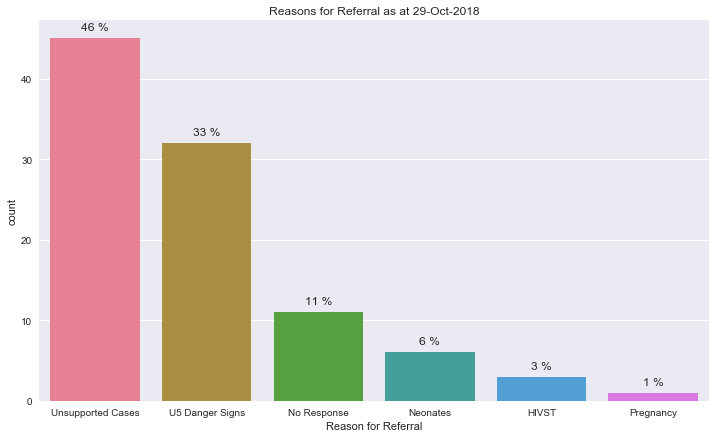

In [7]:
## Count of reasons for referral based on the broad categories
plotObject()
ax = sns.countplot( data=db, x="Reason for Referral", order=db["Reason for Referral"].value_counts().index )

# set % 
total = len( db["Reason for Referral"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.0f} %'.format(height/total*100),
            ha="center") 
    
plt.title('Reasons for Referral as at %s'% LAST_UPDATED ) ;

## Timing of Referrals

Looking at when the referrals happen and if any preferrences for different reasons for referrals

- Digital referral went live on 22-Aug. 
- HIVST referral went live on 24-Oct


    
1. The number of referrals recorded seems to be increasing over time
    - There are more referrals in subsequent months. However, this is only 2.5 months of data so far. Let's see how that holds up 
        - Do we have more referral activity now or is this just the pilot picking up? Another analysis suggests that about 84% of the main program CHVs have a referral activity the period Nov-2017 to Mar-2018. The trial CHVs has 90% of the CHVs with referral activity   


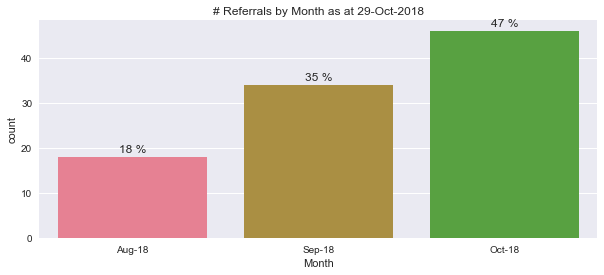

In [8]:
## 1.a. referrals by Month
plotObject(10,4)
ax = sns.countplot( data=db, x="Month" ) 
# set % 
total = len( db)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.0f} %'.format(height/total*100),
            ha="center") 
    
plt.title('# Referrals by Month as at %s'% LAST_UPDATED ) ;

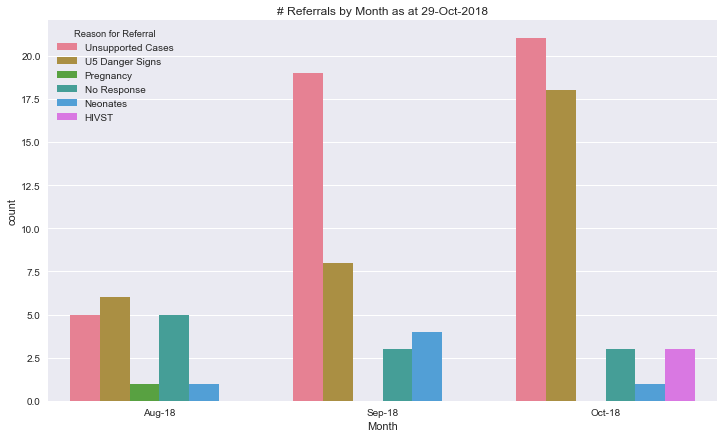

In [9]:
## 1.b referrals by Month and by reason 
plotObject()
ax = sns.countplot( data=db, x="Month" , hue="Reason for Referral",)  

plt.title('# Referrals by Month as at %s'% LAST_UPDATED) ;

2. Most of the referrals were on Mondays and Thursdays. What could this say about CHV prioritization? 
    - ICCM cases have more referrals on Mondays and Fridays
    - Neonate cases have more referrals on Mondays and all 6 cases happen in the Mon - Wed moment. 
    

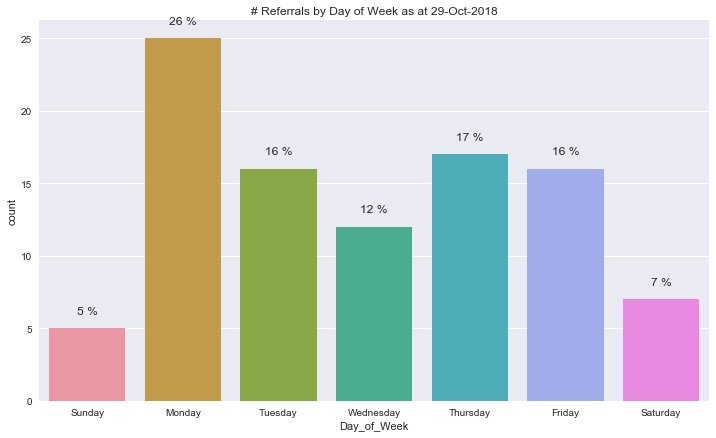

In [10]:
## 2. Referrals by Day of the Week
plotObject()
ax = sns.countplot( data=db, x="Day_of_Week", order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"] )
# set % 
total = len( db)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.0f} %'.format(height/total*100),
            ha="center") 
    
plt.title('# Referrals by Day of Week as at %s'% LAST_UPDATED ) ;

# Referrals by Day of Week as at 29-Oct-2018


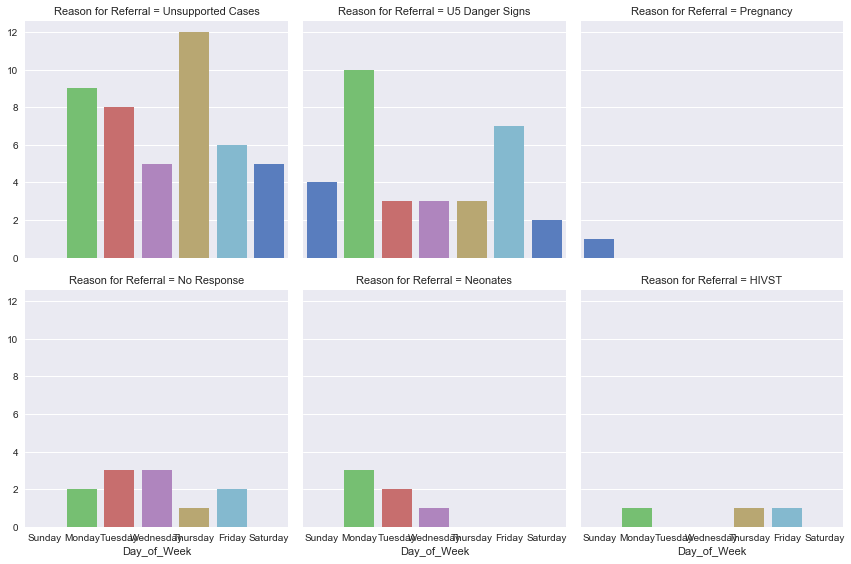

In [11]:
## 3. Referrals by Day of Week and Reason for Referral 
#plotObject( nc=3)

print('# Referrals by Day of Week as at %s'% LAST_UPDATED)

sns.FacetGrid(data=db, col="Reason for Referral", size=4, aspect = 1, col_wrap=3).map( 
    sns.countplot, "Day_of_Week",  palette='muted', 
    order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"] ); #.add_legend()


### Word Cloud

Translation for Swahili to English not done. Number of swahili entries are few, though 

- U5 related cases are most pronounced. E.G. diarrhoea, fever, cough 
- Words like 'month, two, old, health facility' relate to description of neonates and the requirement that they should be referral 
- Phrases with the word 'week' 



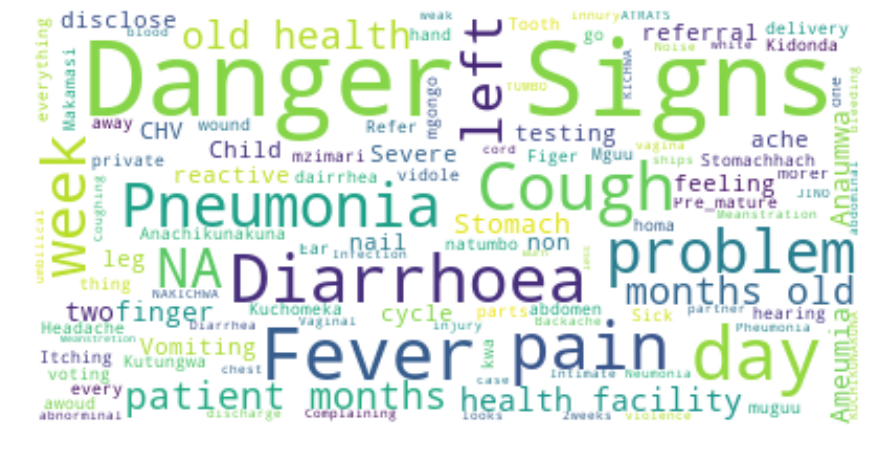

In [12]:
## stop words - use built in set of words 
## Translating Swahili to Eng 
plotObject( 15, 10)
plt.imshow( WordCloud( background_color="white", max_font_size=50, max_words=200,
                     ).generate( " ".join( db["Referral Reason"].fillna(' ') ) ) , interpolation='bilinear'  )
plt.axis( "off" )
plt.show(); 

In [13]:
## where referral reason contains 'week'
display(HTML('<h5>Referral reasons with the word <i>week</i> </h5>'))
db[ db['Referral Reason'].astype(str).str.contains('WEEK', na=False, case=False) ] 

,Date of referral,CHV Name,CHV Phone,Patient Name,Referral Reason,Reason for Referral,Year,Month,Day_of_Week
36,2018-09-27,Eunice Nyambune Machogu,2.547400e+11,Anna Ombiro,Cough morer than one week,Unsupported Cases,2018,Sep-18,Thursday
30,2018-10-01,Evalyn Moraa Peter,2.547400e+11,Shalon,Diarrhoea for two weeks or more,U5 Danger Signs,2018,Oct-18,Monday
91,2018-10-01,Evalyn Moraa Peter,2.547400e+11,Shadrak Omoga,"Diarrhoea for 2 weeks or more,",U5 Danger Signs,2018,Oct-18,Monday
59,2018-10-01,Evalyn Moraa Peter,2.547400e+11,Shadrak Omoga,Diarrhoea for two weeks or more,U5 Danger Signs,2018,Oct-18,Monday
49,2018-10-05,Juliah Kerubo Mogeni,2.547400e+11,Jones Zaboln,Cough for 2weeks and Neumonia,Unsupported Cases,2018,Oct-18,Friday
8,2018-10-08,Salome Osebe Chogo,2.547400e+11,Idea Nyaboke,"Fever for 1 - 2 weeks, Danger Signs,",U5 Danger Signs,2018,Oct-18,Monday


In [19]:
## Where referral reason contains 'finger or pain' 
display(HTML('<h5>Referral reasons with the word <i>finger</i> </h5>'))
db[ db['Referral Reason'].astype(str).str.contains('Finger', na=False, case=False) ] 


display(HTML('<h5>Referral reasons with the word <i>pain</i> </h5>'))
display(HTML('For example, <ul> <li>Rows 46, 68 and 19 could relate to pregnancy or general cases but we cannot tell from the data</li> </ul>'))
db[ db['Referral Reason'].astype(str).str.contains('pain', na=False, case=False) ] 

,Date of referral,CHV Name,CHV Phone,Patient Name,Referral Reason,Reason for Referral,Year,Month,Day_of_Week
37,2018-09-17,Winfridah Kerubo Moses,2.547400e+11,Norah Swanya,Finger nail ache,Unsupported Cases,2018,Sep-18,Monday
28,2018-09-27,Evalyn Moraa Peter,2.547400e+11,Salome Onchiri,She is feeling pain on is left finger,Unsupported Cases,2018,Sep-18,Thursday
61,2018-09-27,Evalyn Moraa Peter,2.547400e+11,Salome Onchiri,She is feeling pain on is left finger,Unsupported Cases,2018,Sep-18,Thursday


,Date of referral,CHV Name,CHV Phone,Patient Name,Referral Reason,Reason for Referral,Year,Month,Day_of_Week
46,2018-09-06,Rachel Kemunto Mokua,2.547400e+11,Moraa Rioba,Stomach pain,Unsupported Cases,2018,Sep-18,Thursday
28,2018-09-27,Evalyn Moraa Peter,2.547400e+11,Salome Onchiri,She is feeling pain on is left finger,Unsupported Cases,2018,Sep-18,Thursday
61,2018-09-27,Evalyn Moraa Peter,2.547400e+11,Salome Onchiri,She is feeling pain on is left finger,Unsupported Cases,2018,Sep-18,Thursday
60,2018-10-16,Rachel Kemunto Mokua,2.547400e+11,Elijah Babu,Coughing with chest pain,U5 Danger Signs,2018,Oct-18,Tuesday
58,2018-10-24,Jane Nariaka David,2.547400e+11,Caro Ayiecha,Severe abdominal pains,Unsupported Cases,2018,Oct-18,Wednesday
19,2018-10-26,Nivah Gesare Onyando,2.547400e+11,Hellen Kerubo Luka,Severe abnorminal pain,Unsupported Cases,2018,Oct-18,Friday


In [15]:
## Where referral reason cotains 'stomach'
display(HTML('<h5>Referral reasons with the word <i>stomach</i> </h5>'))
db[ db['Referral Reason'].astype(str).str.contains('Stoma', na=False, case=False) ] 

,Date of referral,CHV Name,CHV Phone,Patient Name,Referral Reason,Reason for Referral,Year,Month,Day_of_Week
35,2018-08-23,Evalyn Moraa Peter,2.547400e+11,Peris jebet,Stomachhach $ dairrhea,U5 Danger Signs,2018,Aug-18,Thursday
46,2018-09-06,Rachel Kemunto Mokua,2.547400e+11,Moraa Rioba,Stomach pain,Unsupported Cases,2018,Sep-18,Thursday
64,2018-09-06,Salome Kenyanya,2.547400e+11,Spinicah Bosibori,Stomach and voting,Unsupported Cases,2018,Sep-18,Thursday
51,2018-10-02,Jane Nariaka David,2.547400e+11,Hyvone Nyabate,Complaining of stomach problem and looks weak,Unsupported Cases,2018,Oct-18,Tuesday
